## **Brain Tumour Detection Model**

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Input
from preprocess import plot_images
import os
import cv2
import matplotlib.pyplot as plt
from tf_keras_vis.saliency import Saliency
print(f"All packages imported successfully.")

All packages imported successfully.


In [2]:
IMAGE_SIZE= 224
DATASET_PATH = '../data'


In [3]:
classes = ['glioma', 'meningioma', 'pituitary', 'notumor']
data_type = ['Training', 'Testing']
class_to_label = {classes[i]: i for i in range(len(classes))}

In [4]:
images=[]
labels=[]

In [5]:
for classname in classes:
    classpath = os.path.join(DATASET_PATH, data_type[0],classname)
    for img_name in os.listdir(classpath):
        img_path = os.path.join(classpath, img_name)

        img = cv2.imread(img_path)
        img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))


        images.append(img)
        labels.append(class_to_label[classname])
print(f"Total Images: {len(images)}")



Total Images: 5712


In [6]:
training_data_path = os.path.join(DATASET_PATH, data_type[0])
testing_data_path = os.path.join(DATASET_PATH, data_type[1])

print(training_data_path)

../data\Training


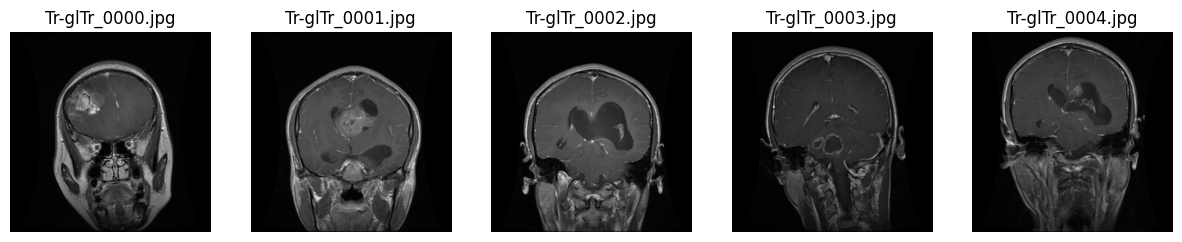

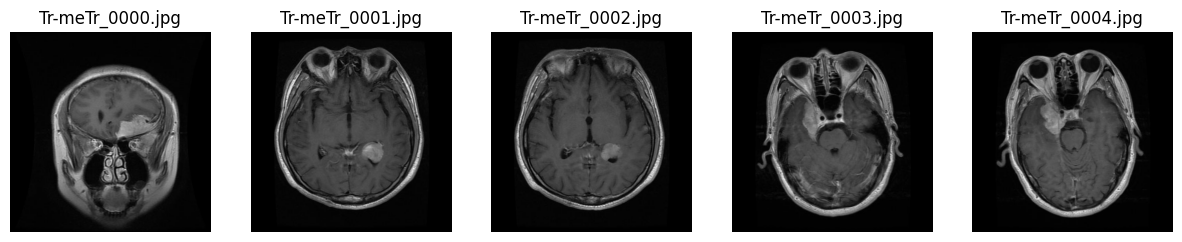

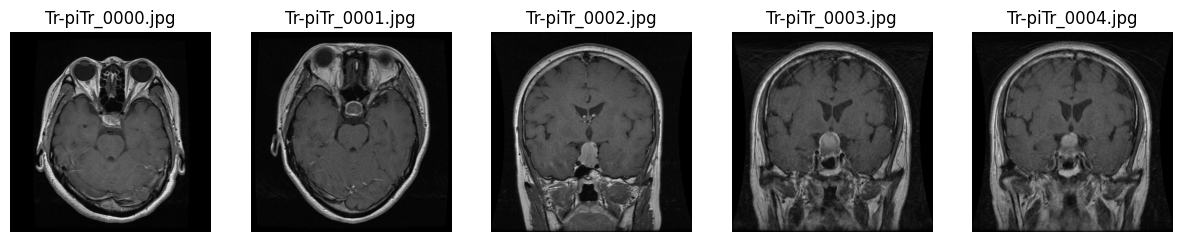

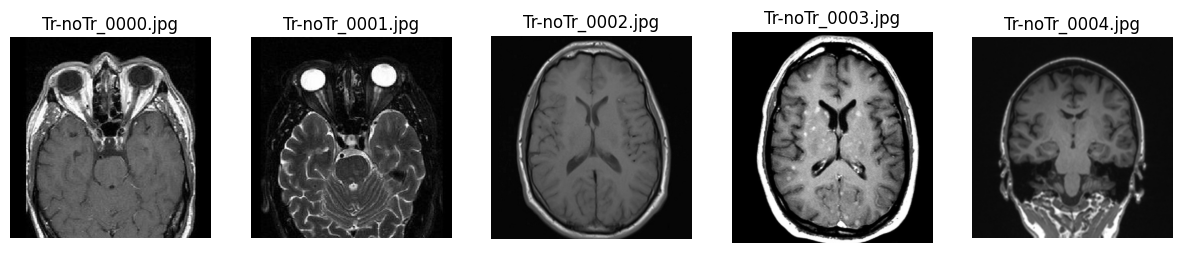

In [7]:
plot_images(os.path.join(training_data_path, classes[0]))
plot_images(os.path.join(training_data_path, classes[1]))
plot_images(os.path.join(training_data_path, classes[2]))
plot_images(os.path.join(training_data_path, classes[3]))

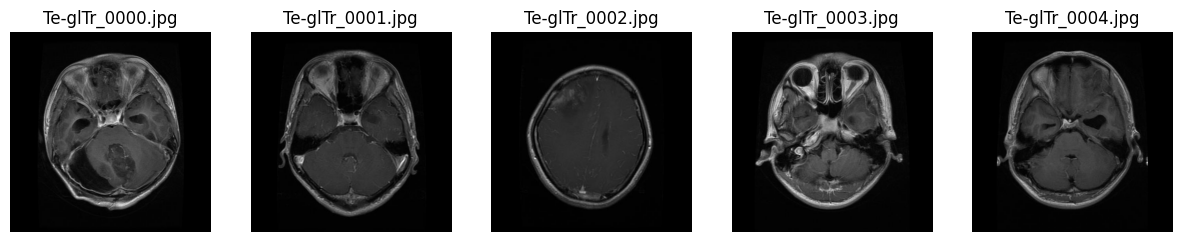

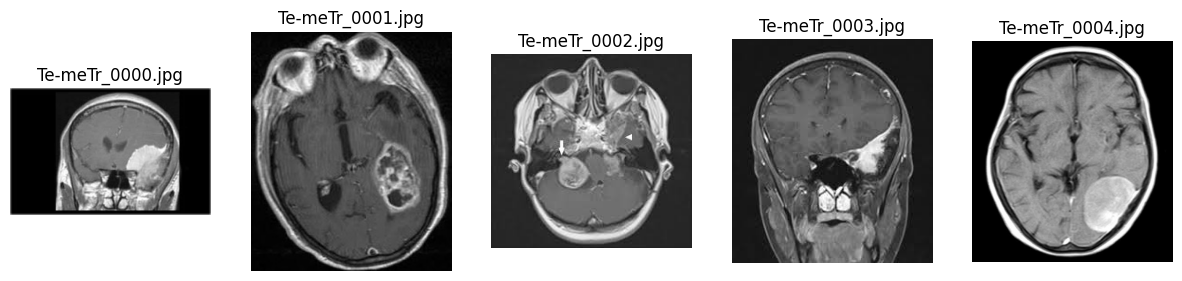

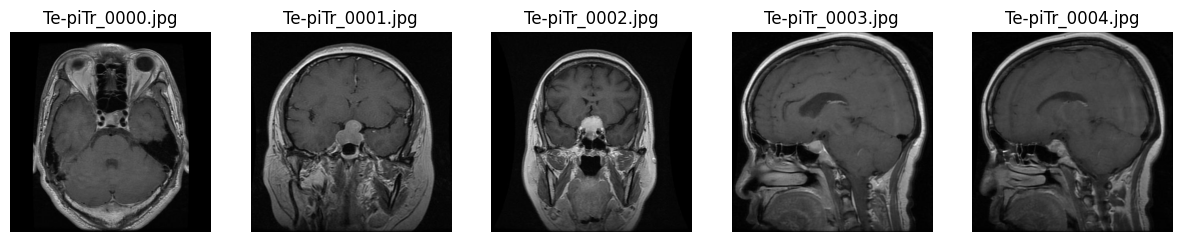

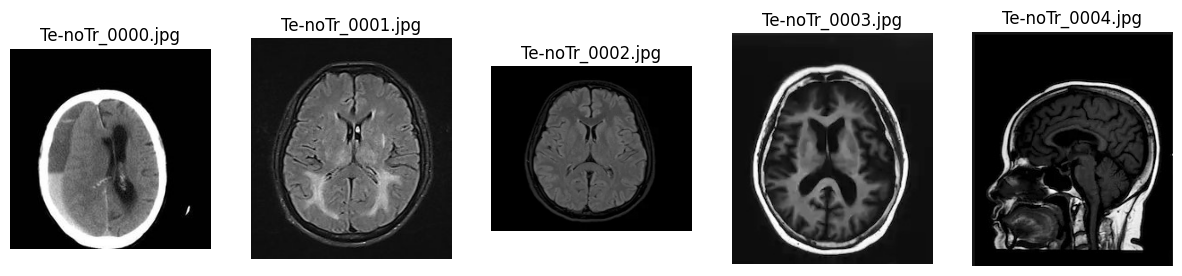

In [8]:
plot_images(os.path.join(testing_data_path, classes[0]))
plot_images(os.path.join(testing_data_path, classes[1]))
plot_images(os.path.join(testing_data_path, classes[2]))
plot_images(os.path.join(testing_data_path, classes[3]))

In [12]:
from preprocess import load_images
import numpy as np

In [11]:
glioma_images, glioma_labels = load_images(os.path.join(training_data_path, classes[0]), 0)
meningioma_images, meningioma_labels = load_images(os.path.join(training_data_path, classes[0]), 1)
pituitary_images, pituitary_labels = load_images(os.path.join(training_data_path, classes[0]), 2)
no_tumor_images, no_tumor_labels = load_images(os.path.join(training_data_path, classes[0]), 3)

In [13]:
X_train = np.array(glioma_images + meningioma_images + pituitary_images + no_tumor_images)
Y_train = np.array(glioma_labels + meningioma_labels + pituitary_labels + no_tumor_labels)

In [14]:
X_train = X_train / 255.0

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
Y_train = to_categorical(Y_train, num_classes=4)

In [17]:
glioma_images, glioma_labels = load_images(os.path.join(testing_data_path, classes[0]), 0)
meningioma_images, meningioma_labels = load_images(os.path.join(testing_data_path, classes[0]), 1)
pituitary_images, pituitary_labels = load_images(os.path.join(testing_data_path, classes[0]), 2)
no_tumor_images, no_tumor_labels = load_images(os.path.join(testing_data_path, classes[0]), 3)

In [19]:
X_test = np.array(glioma_images + meningioma_images + pituitary_images + no_tumor_images)
Y_test = np.array(glioma_labels + meningioma_labels + pituitary_labels + no_tumor_labels)

In [20]:
X_test = X_test / 255.0

In [21]:
Y_test = to_categorical(Y_test, num_classes=4)

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

In [31]:
sample_image = X_train[0].reshape((1,224,224,3))

In [32]:
augmented_images = train_datagen.flow(sample_image, batch_size=1)

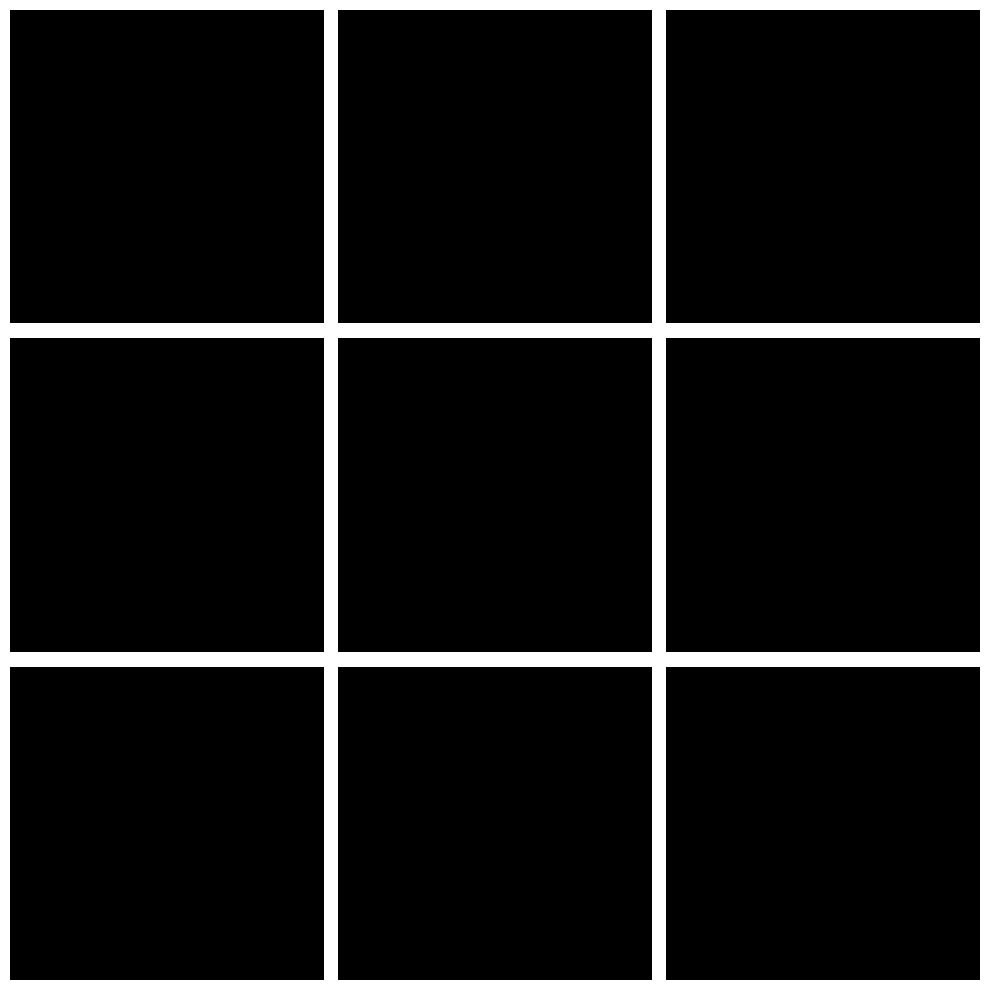

In [36]:
plt.figure(figsize=(10,10))
for i in range(9):
    augmented_img = augmented_images[0][0]
    plt.subplot(3,3,i+1)
    plt.imshow(augmented_img)
    plt.axis('off')
plt.tight_layout()
plt.show()

### **Model Architecture Design**